In [36]:
from bs4 import BeautifulSoup
from selenium import webdriver  

from selenium.webdriver.common.action_chains import ActionChains

In [10]:
url = 'http://pvp.qq.com/web201605/wallpaper.shtml###'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}

In [12]:
browser = webdriver.PhantomJS(executable_path="D:/python/phantomjs/bin/phantomjs.exe")
browser.get(url)

D:\python\lib\site-packages\selenium\webdriver\phantomjs\webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [13]:
data = browser.page_source
soup = BeautifulSoup(data, 'lxml')

In [17]:
lis = soup.find('div', attrs={'class':'p_hd'}).find_all('div',attrs={'class':'p_newhero_item'})

In [25]:
lis[0].find_all('li')[4].find('a')['href']


'http://shp.qpic.cn/ishow/2735100811/1538969026_-888937974_15812_sProdImgNo_6.jpg/0'

In [31]:
soup.find('div',attrs={'id':'Page_Container_267733'}).find('a',attrs={'alt':'下一页'})

<a alt="下一页" class="downpage" href="javascript:Work_267733.Page(1,0);">下一页</a>

In [32]:
url = 'http://pvp.qq.com/'


In [33]:
driver = webdriver.PhantomJS(executable_path="D:/python/phantomjs/bin/phantomjs.exe")
driver.get(url)

D:\python\lib\site-packages\selenium\webdriver\phantomjs\webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [37]:
#1,找到游戏资料这个元素，xpath语法进行元素定位
moveElement = driver.find_element_by_xpath('//a[@title="游戏资料"]')


In [38]:
#2.模拟鼠标悬浮的行为，鼠标事件
ActionChains(driver).move_to_element(moveElement).perform()


<!DOCTYPE html><html lang="zh-CN"><head>
<meta charset="gbk">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
<meta name="robots" content="all">
<meta name="author" content="Tencent-TGideas">
<meta name="Copyright" content="Tencent">
<meta name="description" content="《王者荣耀》是腾讯天美工作室推出的英雄竞技手游，不是一个人的王者，而是团队的荣耀！5v5王者峡谷PVP对战，领略英雄竞技的酣畅淋漓！更有边境突围、五军对决等丰富的游戏模式，体验突破传统、英雄竞技新形态！">
<meta name="keywords" content="王者荣耀,王者荣耀下载,王者荣耀电脑版">
<title>王者荣耀官方网站-腾讯游戏</title>
<!-- 页面设计：alvinxin | 页面制作：sonichuang | 创建：2017-06-06 | 团队博客：//tgideas.qq.com/ test-->
    <meta name="baidu-site-verification" content="6zFCAGAmfZ">
<style>
/*------reset------*/
body,dl,dd,ul,ol,h1,h2,h3,h4,h5,h6,p,form{margin:0;}
h1,h2,h3,h4,h5,h6{font-size:100%;}
em,i,b{font-style:normal;}
ul,ol{list-style:none;}
a{text-decoration:none;color:#363636;}
a:hover{text-decoration:none;}
img{display:block;border:0;border-radius:2px 2px 2px 2px;}
button,input,select,textarea{font-size:100%;outline:none;}
textarea{resize:none;}
ta
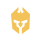

In [39]:
#3.点击游戏壁纸这个链接
driver.find_element_by_xpath('//a[@title="游戏壁纸"]').click()
print(driver.page_source)

In [51]:
import os
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
import requests
import time


driver = webdriver.PhantomJS(executable_path="D:/python/phantomjs/bin/phantomjs.exe")
driver.maximize_window()
url = 'http://pvp.qq.com/'
driver.get(url)
moveElement = driver.find_element_by_xpath('//a[@title="游戏资料"]')
ActionChains(driver).move_to_element(moveElement).perform()
driver.find_element_by_xpath('//a[@title="游戏壁纸"]').click()

all_h = driver.window_handles
driver.switch_to.window(all_h[1])

time.sleep(3)

os.chdir("C:\\Users\\Think\\Desktop\\王者荣耀壁纸")
page_num = 0
while page_num < 12:
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    Lists = soup.find_all('div', {'class': 'p_newhero_item'})
    titleLists = []
    hrefLists = []
    for item in Lists:
        subSoup = BeautifulSoup(str(item), 'html.parser')
        titleList = subSoup.find('h4')
        titleLists.append(titleList.text)
        linkList = subSoup.find('li', {'class': 'sProdImgL6'})
        soup = BeautifulSoup(str(linkList), 'html.parser')
        a = soup.find('a')
        hrefLists.append(a['href'])

    for i in range(len(titleLists)):
        url = hrefLists[i]
        r = requests.get(url).content
        path = titleLists[i] + '.jpg'
        try:
            with open(path, 'wb') as f:
                f.write(r)
                print('保存成功 %s.jpg' % titleLists[i])
        except:
            print('保存失败')
    driver.find_element_by_xpath('//a[@class="downpage"]').click()

    time.sleep(3)
    page_num = page_num + 1

driver.close()

D:\python\lib\site-packages\selenium\webdriver\phantomjs\webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


保存成功 阿轲-节奏热浪.jpg
保存成功 梦奇-胖达荣荣.jpg
保存成功 伽罗·花见巫女.jpg
保存成功 伽罗-破魔之箭.jpg
保存成功 阿轲-节奏热浪.jpg
保存成功 梦奇-胖达荣荣.jpg
保存成功 伽罗·花见巫女.jpg
保存成功 伽罗-破魔之箭.jpg
保存成功 狂铁-御狮.jpg
保存成功 白起-星夜王子.jpg
保存成功 盾山-极冰防御线.jpg
保存成功 盾山-无尽之盾.jpg
保存成功 程咬金-功夫厨神.jpg
保存成功 嬴政-暗夜贵公子.jpg
保存成功 鬼谷子-幻乐之宴.jpg
保存成功 孙悟空-全息碎影.jpg
保存成功 司马懿-魇语军师.jpg
保存成功 司马懿-寂灭之心.jpg
保存成功 后羿-黄金射手座.jpg
保存成功 诸葛亮-掌控之力.jpg
保存成功 李白-敏锐之力.jpg
保存成功 李元芳-逐浪之夏.jpg
保存成功 公孙离-蜜橘之夏.jpg
保存成功 孙策-海之征途.jpg
保存成功 阿轲-节奏热浪.jpg
保存成功 梦奇-胖达荣荣.jpg
保存成功 伽罗·花见巫女.jpg
保存成功 伽罗-破魔之箭.jpg
保存成功 孙策-光明之海.jpg
保存成功 刘禅-天才门将.jpg
保存成功 元歌-午夜歌剧院.jpg
保存成功 元歌-无间傀儡.jpg
保存成功 典韦-穷奇.jpg
保存成功 哪吒-逐梦之翼.jpg
保存成功 杨戬.jpg
保存成功 裴擒虎-梅西.jpg
保存成功 蔡文姬-舞动绿茵.jpg
保存成功 姜子牙-时尚教父.jpg
保存成功 孙尚香-沉稳之力.jpg
保存成功 夏侯惇-不羁之风.jpg
保存成功 远游之枪-马可波罗.jpg
保存成功 精准探案法-米莱狄.jpg
保存成功 筑城者-米莱狄.jpg
保存成功 铠-曙光守护者.jpg
保存成功 老夫子-功夫老勺.jpg
保存成功 狂铁-战车意志.jpg
保存成功 狂铁-命运角斗场.jpg
保存成功 牛魔-制霸全明星.jpg
保存成功 阿轲-节奏热浪.jpg
保存成功 梦奇-胖达荣荣.jpg
保存成功 伽罗·花见巫女.jpg
保存成功 伽罗-破魔之箭.jpg
保存成功 芈月-重明.jpg
保存成功 特工魅影-百里守约.jpg
保存成功 神奇女侠-雅典娜.jpg
保存成功 李白-青莲剑仙.jpg
保存成功 言灵之书-张良.jpg
保存成功 踏雪寻梅-弈星.jpg


In [48]:

import os
os.chdir("C:\\Users\\Think\\Desktop\\王者荣耀壁纸")
